# Classification and time series analysis of LinkedIn companies using their daily change in number of followers.
### The purpose of this analysis is to classify companies that have linekedIn presence into three clusters using the number of new followers they get each day and then use time series analysis to see the trend for each cluster.
# -----------------------------------------------------------------------------------------------------

### Imports modules needed

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


### Reads the csv data. The data is a time series data on the number of linkedin followers each day from 2015 - 2018.

In [2]:
df = pd.read_csv("linkedin_company.csv",low_memory=False)
df.head(5)

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN


# Data exploration
## The data has too many columns that we don't need. We are only interested in the variation of change in followers count with each day of the week for any given company. So, we can either load only the columns we need or we slice it from the loaded data. Let's do the later.

In [3]:
LinkedIn_data= df[['as_of_date','industry','company_name','followers_count']].copy()
LinkedIn_data.head(5)

,as_of_date,industry,company_name,followers_count
0,2015-09-14,Investment Banking,Goldman Sachs,552254
1,2015-09-15,Investment Banking,Goldman Sachs,552862
2,2015-09-16,Aviation & Aerospace,United Technologies,59157
3,2015-09-16,Pharmaceuticals,Novo Nordisk,336175
4,2015-09-16,Retail,"Lowe's Companies, Inc.",134255


## Features extraction. We will now use the average daily change in followers counts for each day of the week, as well as average daily change as features

In [4]:
company_df = LinkedIn_data.groupby('company_name')
company_data = company_df.get_group('Google')
company_data = company_data.sort_values(by=['as_of_date'])
company_data.reset_index(inplace=True,drop=True)
company_data['as_of_date'] = pd.to_datetime(company_data['as_of_date'])
company_data["day_diff"] = company_data['as_of_date'].diff()
company_data["daily_change_in_followers_count"] = company_data['followers_count'].diff()
company_data['day_name'] = company_data['as_of_date'].apply(lambda x: x.day_name())
days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
company_data_week = company_data.groupby('day_name').mean()['daily_change_in_followers_count'].reindex(days).to_frame()
a = company_data_week.T
changes_in_folowers = a.loc['daily_change_in_followers_count'].to_list()
data_df = pd.DataFrame(columns = ['Company','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
changes_in_folowers.insert(0,"Google")
data_df.loc[len(data_df.index)] = changes_in_folowers
data_df["avg_daily_change"] = data_df.sum(axis = 1)
data_df.round()

,Company,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,avg_daily_change
0,Google,3430.0,4902.0,4632.0,4719.0,4508.0,3503.0,3214.0,28907.0


# Bringing all together

In [84]:
df = pd.read_csv("linkedin_company.csv",low_memory=False)

In [85]:
data_df = pd.DataFrame(columns = ['industry','company','Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
LinkedIn_data= df[['as_of_date','company_name','followers_count','industry']]
industries = LinkedIn_data.groupby('industry')
industry_name = industries.groups
for industry in industry_name:
    #print(industry)
    industry_df = industries.get_group(industry)
    company_df = industry_df.groupby('company_name')
    company_name = company_df.groups
    for company in company_name:
        #print("Working on",company,'...')
        company_data = company_df.get_group(company)
        company_data = company_data.sort_values(by=['as_of_date'])
        company_data.reset_index(inplace=True,drop=True)
        company_data['as_of_date'] = pd.to_datetime(company_data['as_of_date'])
        company_data["day_diff"] = company_data['as_of_date'].diff()
        company_data["daily_change_in_followers_count"] = company_data['followers_count'].diff()
        company_data["daily_change_in_followers_count"] =abs(company_data["daily_change_in_followers_count"])
        company_data['day_name'] = company_data['as_of_date'].apply(lambda x: x.day_name())
        days = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        company_data_week = company_data.groupby('day_name').mean()['daily_change_in_followers_count'].reindex(days).to_frame()
        a = company_data_week.T
        changes_in_folowers = a.loc['daily_change_in_followers_count'].to_list()
        changes_in_folowers.insert(0,company)
        changes_in_folowers.insert(0,industry)
        data_df.loc[len(data_df.index)] = changes_in_folowers
data_df
        

,industry,company,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Accounting,CBIZ Tofias,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Accounting,Cherokee Inc.,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Accounting,Computerized Waste Systems,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Accounting,GSV Capital Corp (0GV),0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Accounting,General Dynamics Shared Resources,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
5524,Wireless,"xG Technology, Inc.",0.0,0.0,0.0,0.0,0.0,0.0,0.0
5525,Writing and Editing,Datamation.com,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5526,Writing and Editing,InfoStor,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5527,Writing and Editing,Weblogs Inc,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Make a copy of the dataframe so we don't change the original dataframe.

In [86]:
clean_data_df = data_df.copy()
clean_data_df.head(5)

,industry,company,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,Accounting,CBIZ Tofias,0.142857,0.0,0.000000,0.0,0.0,0.0,0.0
1,Accounting,Cherokee Inc.,0.000000,0.0,0.230769,0.0,0.0,0.0,0.0
2,Accounting,Computerized Waste Systems,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,Accounting,GSV Capital Corp (0GV),0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,Accounting,General Dynamics Shared Resources,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


## Add average daily change in followers column

In [87]:
clean_data_df['avg_daily_new_followers'] = clean_data_df.mean(axis=1).round()


## Lots of companies have little or no daily change in number of follower. It is good to remove them. We will use a threshold of 10 to remove companies much less know companies so as to cleane the data of noise.

In [88]:
clean_data_df_ = clean_data_df[clean_data_df['avg_daily_new_followers']>=10]
clean_data_df_.head(5)

,industry,company,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,avg_daily_new_followers
18,Airlines/Aviation,Alaska Airlines,27.029412,45.384058,49.137681,56.029197,42.306569,32.044118,26.547445,40.0
20,Airlines/Aviation,American Airlines,117.035971,196.561151,262.333333,206.014493,184.330935,148.869565,107.366906,175.0
22,Airlines/Aviation,Avianca,116.738095,216.228916,210.939024,211.259259,181.759036,147.891566,102.083333,170.0
24,Airlines/Aviation,Bristow Group,7.846154,12.500000,12.017094,12.077586,11.811966,8.267241,7.646552,10.0
26,Airlines/Aviation,China Southern Airlines,9.320988,12.604938,11.550000,12.151899,11.814815,9.580247,9.037500,11.0


In [89]:
clean_data_df_.sort_values(['avg_daily_new_followers']).tail()

,industry,company,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,avg_daily_new_followers
3018,Internet,Google,3546.565217,5042.528986,5512.323741,4873.875912,4710.485507,3614.860294,3312.181159,4373.0
3811,Newspapers,The Wall Street Journal,3863.747475,5274.744898,5971.717172,5657.597938,5261.898990,4182.714286,3593.131313,4829.0
3038,Internet,LinkedIn,20961.264706,21895.198529,2578.591241,2774.355556,2195.528986,1648.533333,1679.462687,7676.0
345,Banking,City National Bank,7943.786364,8646.247748,8244.963801,8288.114155,7902.878378,8188.990909,8081.554545,8185.0
2792,Information Technology and Services,Tata Consultancy Services,130069.000000,5759.000000,NaN,NaN,NaN,NaN,NaN,67914.0


## Round the daily changes to the nearest integers. Then remove nan containing rows

In [90]:
clean_data_df_ = clean_data_df_.round()
clean_data_df_.dropna(inplace = True)
clean_data_df_.head(5)

,industry,company,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,avg_daily_new_followers
18,Airlines/Aviation,Alaska Airlines,27.0,45.0,49.0,56.0,42.0,32.0,27.0,40.0
20,Airlines/Aviation,American Airlines,117.0,197.0,262.0,206.0,184.0,149.0,107.0,175.0
22,Airlines/Aviation,Avianca,117.0,216.0,211.0,211.0,182.0,148.0,102.0,170.0
24,Airlines/Aviation,Bristow Group,8.0,12.0,12.0,12.0,12.0,8.0,8.0,10.0
26,Airlines/Aviation,China Southern Airlines,9.0,13.0,12.0,12.0,12.0,10.0,9.0,11.0


## Let's look at the distribution of the data so we can spot outliers.

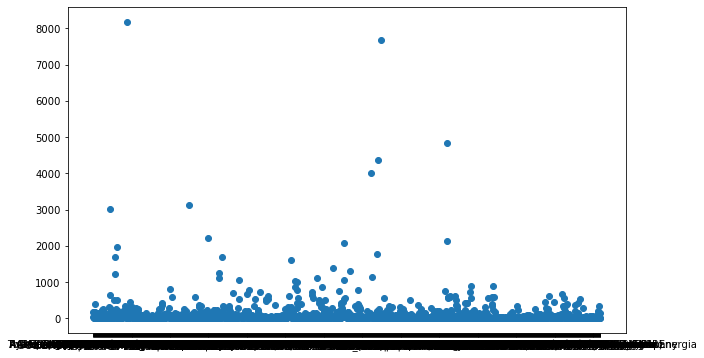

In [91]:
plt.figure(figsize=(10,6))
plt.scatter(clean_data_df_['company'],clean_data_df_['avg_daily_new_followers'])
plt.show()

## Two data points looks like outliers. Let's remove them before doing classification

In [98]:
ML_df= clean_data_df_.sort_values('avg_daily_new_followers').reset_index(drop = True)
ML_df.drop(ML_df.tail(2).index,inplace=True)
ML_df.tail(5)

,industry,company,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,avg_daily_new_followers
1734,Automotive,Ford Motor Company,505.0,794.0,9043.0,9101.0,711.0,538.0,446.0,3020.0
1735,Computer Software,Microsoft,2363.0,3928.0,4209.0,3378.0,3218.0,2482.0,2304.0,3126.0
1736,Internet,Amazon,3237.0,4904.0,4952.0,4641.0,4251.0,3294.0,2853.0,4019.0
1737,Internet,Google,3547.0,5043.0,5512.0,4874.0,4710.0,3615.0,3312.0,4373.0
1738,Newspapers,The Wall Street Journal,3864.0,5275.0,5972.0,5658.0,5262.0,4183.0,3593.0,4829.0


## Let's bin the data to see how it is distributted

(array([1.175e+03, 2.370e+02, 8.400e+01, 4.700e+01, 4.000e+01, 3.200e+01,
        2.100e+01, 1.200e+01, 1.200e+01, 5.000e+00, 1.000e+01, 1.400e+01,
        9.000e+00, 3.000e+00, 3.000e+00, 6.000e+00, 1.000e+00, 2.000e+00,
        2.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 2.000e+00, 2.000e+00,
        0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

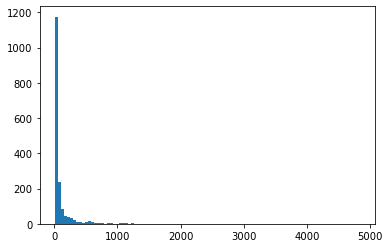

In [93]:
plt.hist(ML_df['avg_daily_new_followers'],bins=100)

## It follows exponential variation. We need to linearize it a bit by using log2

(array([86., 73., 55.,  0., 65., 60., 54., 46., 45., 48., 43., 36., 57.,
        16., 40., 19., 45., 46., 34., 29., 43., 21., 51., 38., 23., 31.,
        35., 27., 28., 20., 24., 31., 16., 22., 25., 27., 23., 21., 21.,
        15., 15., 11., 14., 11., 17.,  9., 16.,  7., 10., 11., 12., 11.,
        10., 10., 12.,  9.,  7.,  8.,  7.,  5.,  9.,  3.,  2.,  6.,  8.,
        11.,  5.,  4.,  2.,  6.,  3.,  1.,  4.,  0.,  1.,  3.,  3.,  1.,
         2.,  1.,  0.,  0.,  2.,  2.,  0.,  1.,  2.,  1.,  0.,  0.,  0.,
         0.,  2.,  0.,  0.,  0.,  0.,  1.,  1.,  1.]),
 array([ 3.32192809,  3.4110839 ,  3.50023971,  3.58939551,  3.67855132,
         3.76770713,  3.85686293,  3.94601874,  4.03517455,  4.12433035,
         4.21348616,  4.30264197,  4.39179777,  4.48095358,  4.57010939,
         4.65926519,  4.748421  ,  4.83757681,  4.92673261,  5.01588842,
         5.10504423,  5.19420003,  5.28335584,  5.37251165,  5.46166745,
         5.55082326,  5.63997906,  5.72913487,  5.81829068,  5.907446

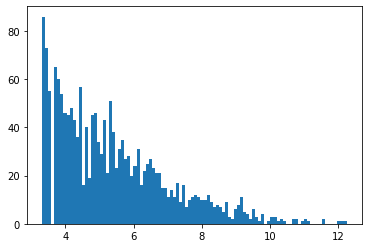

In [94]:
plt.hist(np.log2(ML_df['avg_daily_new_followers']),bins=100)

## Use average change in daily followers number as a feature for classification into well-known, averagely_known and little_known companies, remembering to apply log2 to linearize the data a little.


In [95]:
data_features_df=np.log2(ML_df['avg_daily_new_followers']).to_frame()
n_clusters=3
km = KMeans(n_clusters, init='k-means++', n_init=10)
cluster = km.fit(data_features_df)
cluster_label = cluster.labels_
df_3 = ML_df.copy()
df_3['cluster'] = cluster_label
df_3.head(5)


,industry,company,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,avg_daily_new_followers,cluster
0,Internet,Web.com,6.0,12.0,13.0,13.0,13.0,9.0,6.0,10.0,0
1,Oil &amp; Energy,Gulfport Energy Corporation,1.0,3.0,44.0,12.0,4.0,2.0,3.0,10.0,0
2,Financial Services,Prudential UK,8.0,15.0,11.0,11.0,10.0,8.0,7.0,10.0,0
3,Oil &amp; Energy,Newfield Exploration,8.0,5.0,15.0,16.0,7.0,11.0,6.0,10.0,0
4,Information Technology and Services,Connection,6.0,15.0,11.0,12.0,10.0,8.0,5.0,10.0,0


## Print the names of companies in the clusters

In [96]:
for i in range(n_clusters):
    a = df_3[df_3['cluster']==i]['company'].to_list()
    print(f"\033[1m Cluster \033[0m{i}")
    print(a,'\n')
    print("------------------------------------------------------------------------------------------------")

 Cluster 0
['Web.com', 'Gulfport Energy Corporation', 'Prudential UK', 'Newfield Exploration', 'Connection', 'Cubic Corporation', 'OneMain Financial', 'Tower International', 'Hub Group', 'Mellanox Technologies', 'Accuray', 'Enterprise Products', 'Deluxe Corporation', 'Lattice Semiconductor', 'Lippert Components, Inc.', 'CIRCOR International, Inc.', 'PCM', 'LiveRamp, An Acxiom Company', 'Horizon Pharma plc', 'AMC Theatres', 'Werner Enterprises', 'Stein Mart', 'Cooper Tire &amp; Rubber Company', 'Shiloh Industries', 'West Pharmaceutical Services', 'EP ENERGY', 'Voyager Therapeutics, Inc.', 'IMAX', 'Magellan Health', 'LHC Group', 'Infinera', 'DistributionNOW', 'Ceragon Networks', 'Vulcan Materials Company', 'EnLink Midstream', 'Sibanye-Stillwater', 'USANA Health Sciences', 'Beacon Roofing Supply', 'Planet Fitness World Headquarters', 'Penn National Gaming and Hollywood Casinos', 'UTStarcom', 'Sanderson Farms', 'TrueBlue Inc.', 'PeopleReady', 'Newpark', 'Ascena Retail Group, Inc.', '8x8', 

## A look at the trend of daily change in number of linkedIn followers of each cluster of companies. 

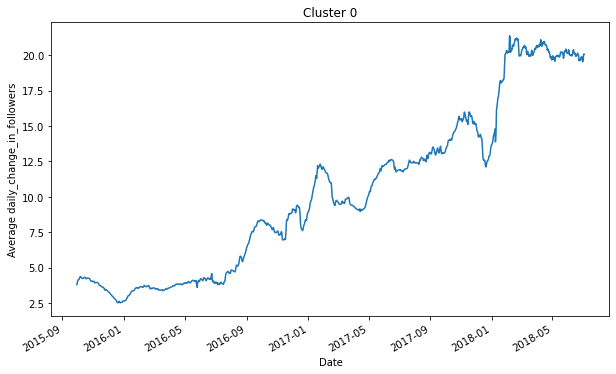

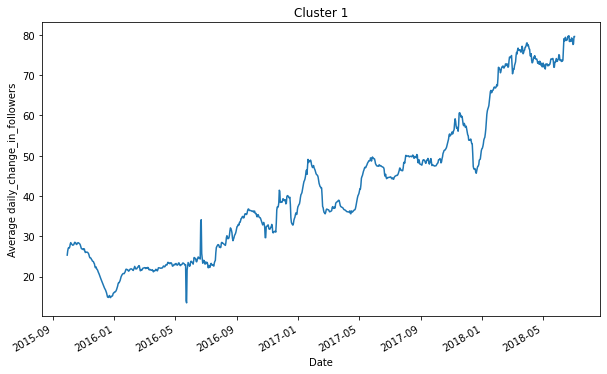

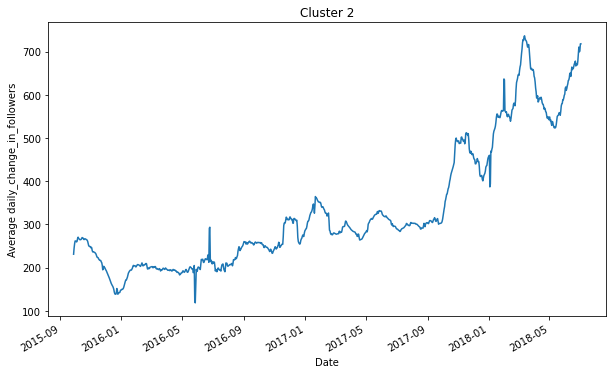

In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose
LinkedIn_data= df[['as_of_date','company_name','followers_count','industry']]
for i in range(3):
    company_name = df_3[df_3['cluster']==i]['company'].to_list() 
    company_df = LinkedIn_data.groupby('company_name')
    count= 1
    for company in company_name:
        #print("At",company)
        company_data = company_df.get_group(company)
        company_data = company_data.sort_values(by=['as_of_date'])
        company_data.reset_index(inplace=True,drop=True)
        company_data['as_of_date'] = pd.to_datetime(company_data['as_of_date'])
        company_data["day_diff"] = company_data['as_of_date'].diff()
        company_data['day_name'] = company_data['as_of_date'].apply(lambda x: x.day_name())
        company_data["change_in_followers_count"]= company_data['followers_count'].diff()
        company_data_df = company_data.copy()
        company_data_df = company_data_df.sort_values(by=['as_of_date'])
        company_data_df.reset_index(inplace=True,drop=True)
        company_data_df['change_in_followers_count'] = company_data_df['change_in_followers_count'].fillna(0)

        company_data_df.set_index('as_of_date', inplace=True)
        if count ==1:
            data = company_data_df['change_in_followers_count'].to_frame().copy()
        else:
            data = data.add(company_data_df['change_in_followers_count'].to_frame().copy(),fill_value=0)
        count+=1

    #Trend analysis
    data
    analysis = data[['change_in_followers_count']].copy()
    analysis['change_in_followers_count'] = analysis['change_in_followers_count']/len(company_name) # average
    decompose_result_mult = seasonal_decompose(analysis, model="additive",period=28)
    plt.figure(figsize=(10,6))
    decompose_result_mult.trend.plot()
    plt.xlabel("Date")
    plt.ylabel("Average daily_change_in_followers")
    plt.title("Cluster "+str(i))
    plt.show()

## We see that the daily change in the number of new followers increases from year to year for each cluster. The trend for each cluster of companies was virtually the same: rate of increase in number of followers are virtually the same. 
## Overall, this points to increasing number of new followers throughout the period of study. This should translate to more revenue for LinkedIn company. Note the large in crease from 2017 to 2018: Revenues jumped from 2,271 million USD to 5,259 million USD.